# Construa um algoritmo genético para encontrar o máximo da função f6 descrita nas notas de aula.

- Implemente o gráfico da média das melhores soluções por experimento.
- Realize um total de 20 experimentos, com tamanho da população de 100 cromossomas por geração e número de gerações igual a 40.
- Utilize as mesmas taxas de crossover e mutação descritas nas notas de aula, assim como tamanho de cromossoma. Use aptidão igual a avaliação.
- Use aptidão igual a Windowing
- Use aptidão igual a normalização linear (1 a 100).
- Utilize Elitismo.
- Use steady state com e sem duplicados.
- Para a implementação do gráfico, o eixo y, deverá mostrar o número de 9 encontrados após a casa decimal e o eixo x o número de gerações. Compare os 3 métodos de aptidão, sem elitismo.

Compare os resultados encontrados
- normalização linear com elitismo,
- normalização linear com elitismo e steady state sem duplicadas
- normalização linear com elitismo e steady state com duplicadas.

Entregue um relatório com o que foi implementado e com todos os resultados encontrados.
Realize uma conclusão crítica de todos os resultados encontrados.#

Para a realização do trabalho, utilizamos as seguintes bibliotecas:

In [209]:
from dataclasses import dataclass
from typing import Union, Callable, Optional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [210]:
Bit = Union['0', '1']

GENE_SIZE = 22
CHROMOSOME_SIZE = 44


In [ ]:
def f6(x: float, y: float) -> float:
    return 0.5 - ((np.sin(np.sqrt(x ** 2 + y ** 2)))
                  ** 2 - 0.5) / ((1 + 0.001 * (x ** 2 + y ** 2)) ** 2)


In [214]:
@dataclass
class Chromosome:
    genes: list[Bit]
    size: int = CHROMOSOME_SIZE

    def __init__(self, genes: list[Bit], size: int = CHROMOSOME_SIZE):
        super().__init__()
        if len(genes) != size:
            raise ValueError(
                f'Chromosome must have at least {size} gene. {len(genes)}')
        if not all([gene in ['0', '1'] for gene in genes]):
            raise ValueError(
                'Chromosome genes must be represented by 0 or 1.')
        self.genes = genes
        self.size = size

    @classmethod
    def from_bit_str(cls, bits: str):
        '''
        Gera um cromossomo a partir de uma string contendo caracteres 0 e 1.
        '''
        return cls([bit for bit in bits])

    @classmethod
    def random(cls, size: int = CHROMOSOME_SIZE):
        '''
        Gera um cromossomo aleatório.
        '''
        return cls([str(np.random.randint(0, 2)) for _ in range(size)], size)

    def mutate(self) -> None:
        '''
        Realiza a operação de mutação no cromossomo.
        '''
        index = np.random.randint(0, len(self.genes))
        self.genes[index] = '0' if self.genes[index] == '1' else '1'

    def crossover(self, other: 'Chromosome', split_point: int = None) -> None:
        '''
        Realiza a operação de crossover entre este e outro cromossomo.
        Se fornecido, a divisão será feita em `split_point`; caso contrário,
        será gerado um ponto de corte aleatoriamente.
        '''
        if split_point is None:
            split_point = np.random.randint(0, len(self.genes))

        temp = self.genes[split_point:]
        self.genes[split_point:] = other.genes[split_point:]
        other.genes[split_point:] = temp

    def copy(self) -> 'Chromosome':
        '''
        Retorna uma cópia do cromossomo.
        '''
        return Chromosome(self.genes.copy(), self.size)

    def __repr__(self) -> str:
        return ''.join(self.genes)

    def _to_int(self) -> tuple[int, int]:
        '''
        Converte a sequência de bits dos genes para um par de números inteiros.
        Usado na conversão para coordenadas.
        '''
        x = int(''.join(self.genes[:GENE_SIZE]), 2)
        y = int(''.join(self.genes[GENE_SIZE:]), 2)
        return x, y

    def to_coords(self, max: float = 100, min: float = -100) -> tuple[float, float]:
        '''
        Usando para o fitness
        '''
        x, y = self._to_int()
        return x * (max - min) / (2 ** GENE_SIZE - 1) + min, y * (max - min) / (2 ** GENE_SIZE - 1) + min

    @property
    def fitness(self, func: Callable[[float, float], float] = f6) -> float:
        '''
        Calcula a aptidão do cromossomo de acordo com a função de avaliação `func`.
        '''
        coords = self.to_coords()
        return func(*coords)


def random_call(chance: float, callback: Optional[Callable] = None) -> bool:
    '''
    Faz um sorteio aleatório com probabilidade `chance`. De acordo com o resultado,
    chama ou não a função `callback`. Retorna o resultado do sorteio.
    '''
    result = np.random.random() < chance
    if callback is not None and result:
        callback()
    return result


Generation 1
Best: 0.7160533713258899 (-1.5624288469383316, -15.201214599898961)
Worst: 0.18340025182961245 (13.237407979347225, -5.509353997553347)
--------------------
Generation 2
Best: 0.7160533713258899 (-1.5624288469383316, -15.201214599898961)
Worst: 0.18340025182961245 (13.237407979347225, -5.509353997553347)
--------------------
Generation 3
Best: 0.7160533713258899 (-1.5624288469383316, -15.201214599898961)
Worst: 0.18340025182961245 (13.237407979347225, -5.509353997553347)
--------------------
Generation 4
Best: 0.7160533713258899 (-1.5624288469383316, -15.201214599898961)
Worst: 0.18340025182961245 (13.237407979347225, -5.509353997553347)
--------------------
Generation 5
Best: 0.7160533713258899 (-1.5624288469383316, -15.201214599898961)
Worst: 0.18340025182961245 (13.237407979347225, -5.509353997553347)
--------------------
Generation 6
Best: 0.7160533713258899 (-1.5624288469383316, -15.201214599898961)
Worst: 0.18340025182961245 (13.237407979347225, -5.509353997553347)
-

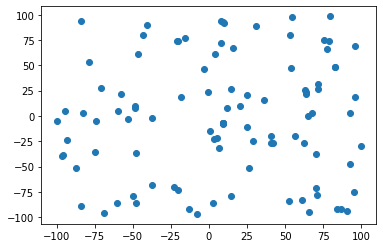

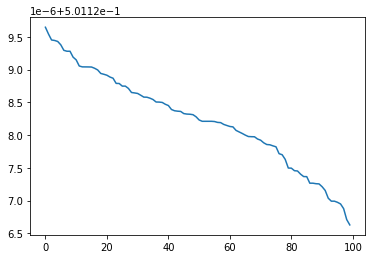

                x           y       fitness
count  100.000000  100.000000  1.000000e+02
mean     9.218751   -1.759912  5.011282e-01
std     57.719692   57.654990  7.203054e-07
min    -99.937057  -96.811818  5.011266e-01
25%    -41.293869  -38.707993  5.011278e-01
50%      9.264448   -2.545190  5.011283e-01
75%     63.349703   47.024190  5.011288e-01
max     99.912930   98.500728  5.011296e-01
            x          y   fitness
3   79.750485  98.500728  0.501130
26  95.806025  69.051306  0.501130
85  78.892321  74.248928  0.501129
96  54.508914  97.733497  0.501129
38  75.696081  74.595207  0.501129


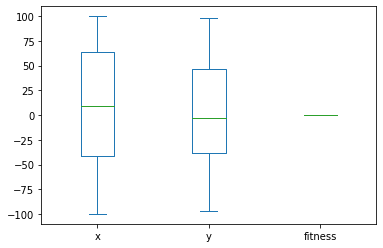

In [216]:
class Population:
    individuals: list[Chromosome]
    mutation_rate: float
    crossover_rate: float
    elitism_number: int
    size: int
    history: pd.DataFrame

    def __init__(self,
                 mutation_rate: float = 0.1,
                 crossover_rate: float = 0.8,
                 size: int = 100,
                 elitism_number: int = 1,
                 ):
        # history of best individuals
        self.history = pd.DataFrame(columns=['generation', 'best_fitness',
                                             'best_x', 'best_y', 'best_chromosome'])

        self.mutation_rate = mutation_rate  # mutation rate
        self.crossover_rate = crossover_rate  # crossover rate
        # number of best individuals to keep each generation
        self.elitism_number = elitism_number
        self.size = size  # population size

        # generate random individuals
        self.individuals = []
        for _ in range(size):
            self.individuals.append(Chromosome.random())
        self.register_gen(0)

    def get_best_n(self, count: int) -> list[Chromosome]:
        '''
        Retorna os `n` melhores indivíduos da população.
        '''
        sorted_pop = sorted(
            self.individuals, key=lambda x: x.fitness, reverse=True)[:count]

        #print([x.fitness for x in sorted_pop])
        # clone the best ones
        return [x.copy() for x in sorted_pop[:count]]

    def train(self, n_generations: int = 40):
        for i in range(0, n_generations):
            self.next_gen()
            self.n_generation = i
            self.register_gen(i+1)

    def register_gen(self, i):
        data = {'generation': i,
                'best_fitness': self.get_best_n(1)[0].fitness,
                'best_x': self.get_best_n(1)[0].to_coords()[0],
                'best_y': self.get_best_n(1)[0].to_coords()[1],
                'best_chromosome': self.get_best_n(1)[0].__repr__()
                }
        self.history = pd.concat(
            [self.history, pd.DataFrame(data, index=[0])], ignore_index=True)

    def next_gen(self):
        the_best_ones = self.get_best_n(self.elitism_number)
        self.crossover_population()
        self.mutate_population()
        self.individuals = the_best_ones + \
            self.individuals[self.elitism_number:]

    def mutate_population(self):
        for individual in self.individuals:
            random_call(self.mutation_rate, callback=individual.mutate)

    def crossover_population(self):
        # shuffle individuals
        np.random.shuffle(self.individuals)
        # crossover
        for i in range(0, len(self.individuals), 2):
            def crossover():
                self.individuals[i].crossover(self.individuals[i+1])
            random_call(self.crossover_rate, callback=crossover)


In [ ]:
# population
population = Population(
    size=100,
    elitism_number=10,
)
population.train(40)
population_history = population.history
print(population.history)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(population_history['best_x'],
           population_history['best_y'], population_history['best_fitness'], c='r', marker='x')

# add f6(x,y) surface
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f6(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f6(x,y)')

plt.show()

# fitness history
plt.plot(population_history['generation'],
         population_history['best_fitness'])
plt.show()
